In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [6]:
data = pd.read_csv('data/Mall_Customers.csv')
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    str  
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4), str(1)
memory usage: 7.9 KB


In [14]:
data.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CustomerID  200 non-null    int64
 1   Gender      200 non-null    str  
 2   Age         200 non-null    int64
 3   Income      200 non-null    int64
 4   Score       200 non-null    int64
dtypes: int64(4), str(1)
memory usage: 7.9 KB


In [11]:
# Visual data exploration

data.CustomerID.duplicated().sum()

data.groupby('Gender')['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'count'})

,Gender,count
0,Female,112
1,Male,88


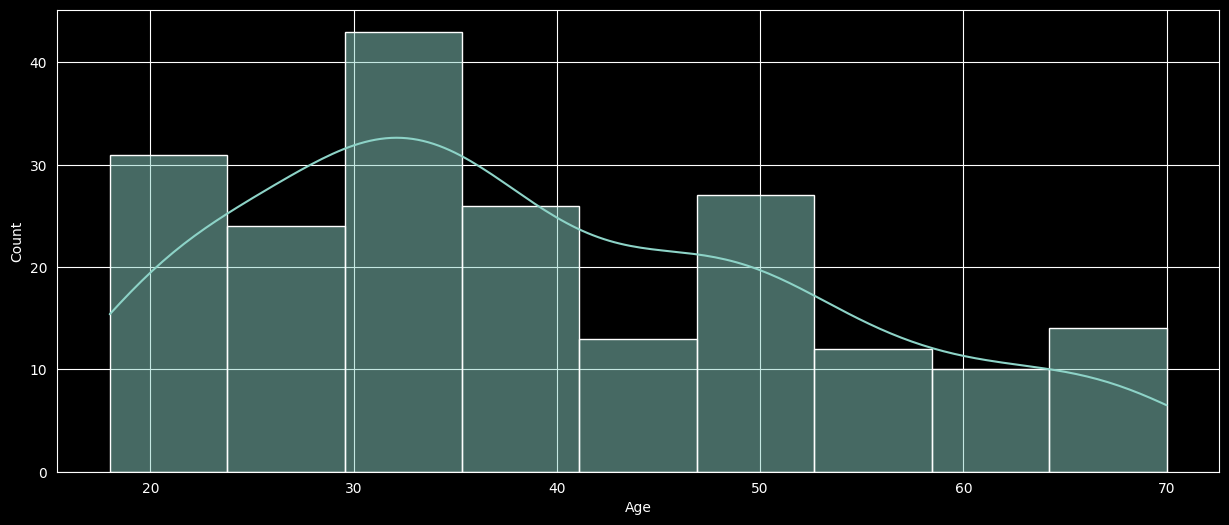

In [41]:
plt.figure(figsize=(15, 6))
sns.histplot(data.Age, kde=True)

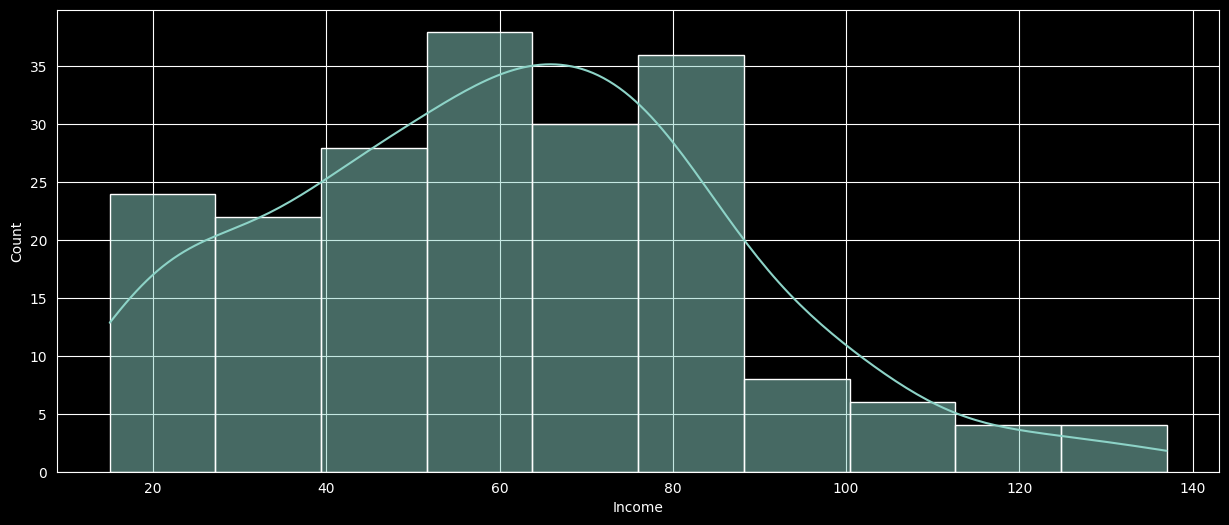

In [42]:
plt.figure(figsize=(15, 6))
sns.histplot(data.Income, kde=True)

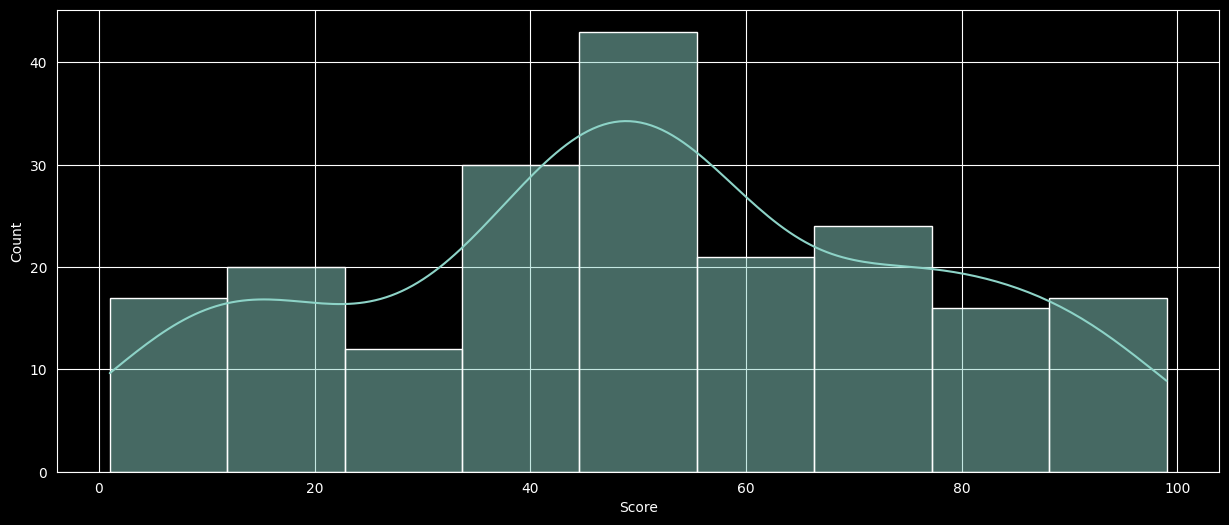

In [43]:
plt.figure(figsize=(15, 6))
sns.histplot(data.Score, kde=True)

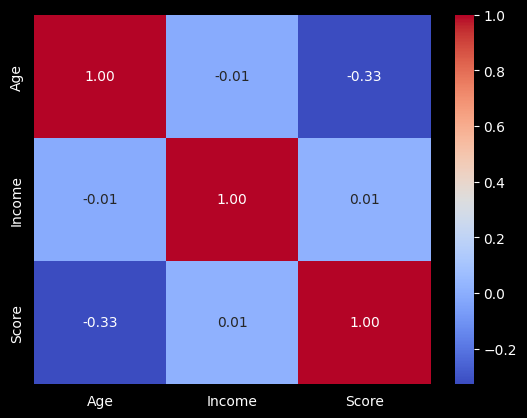

In [18]:
sns.heatmap(data[['Age', 'Income', 'Score']].corr(), annot=True, fmt='.2f', cmap='coolwarm')

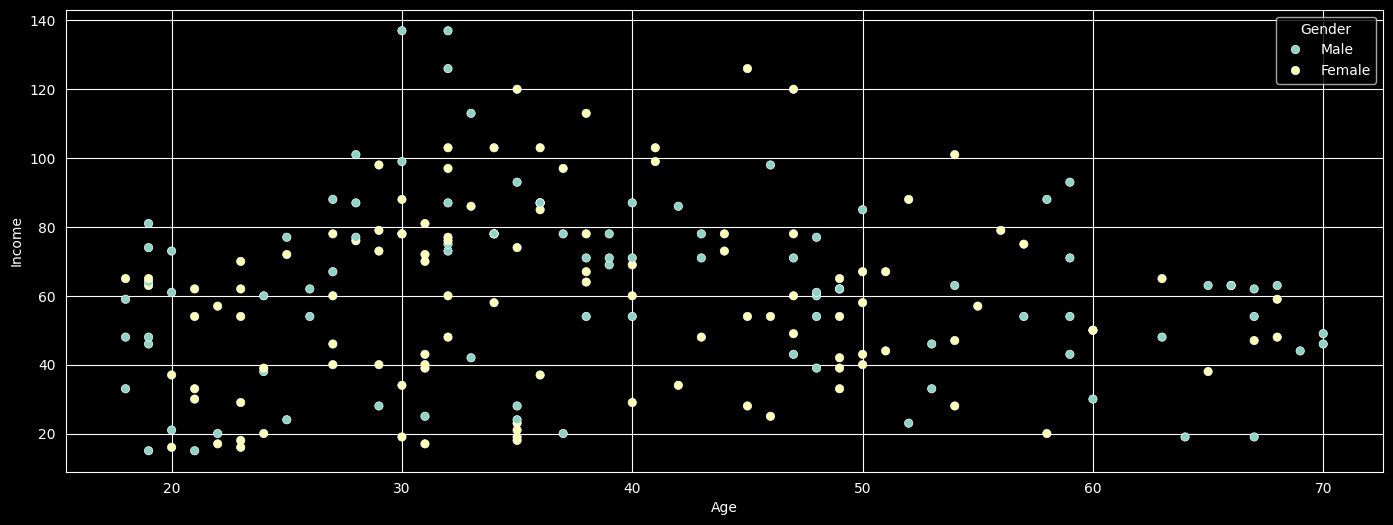

In [39]:
plt.figure(figsize=(17, 6))
sns.scatterplot(data=data, x='Age', y='Income', hue='Gender')

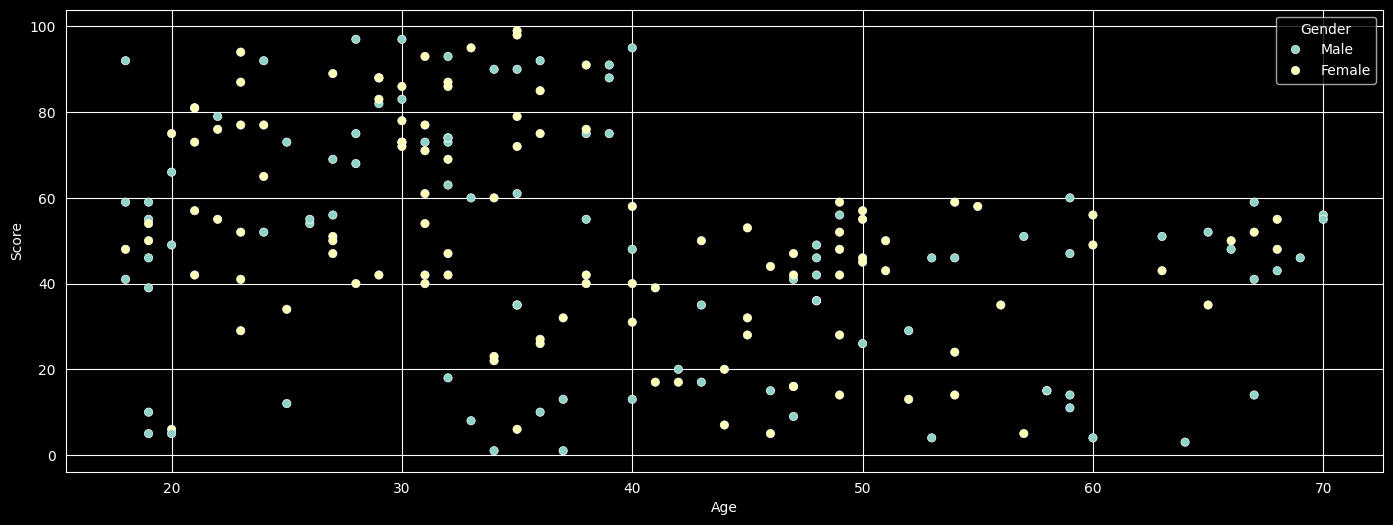

In [37]:
plt.figure(figsize=(17, 6))
sns.scatterplot(data=data, x='Age', y='Score', hue='Gender')

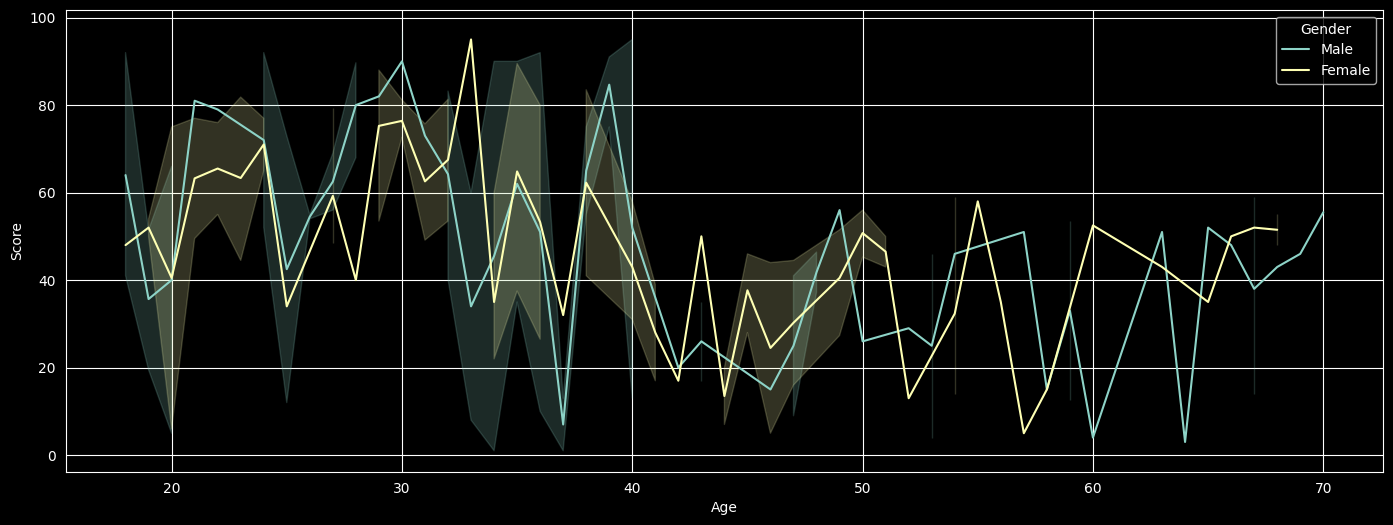

In [38]:
plt.figure(figsize=(17, 6))
sns.lineplot(data=data, x='Age', y='Score', hue='Gender')

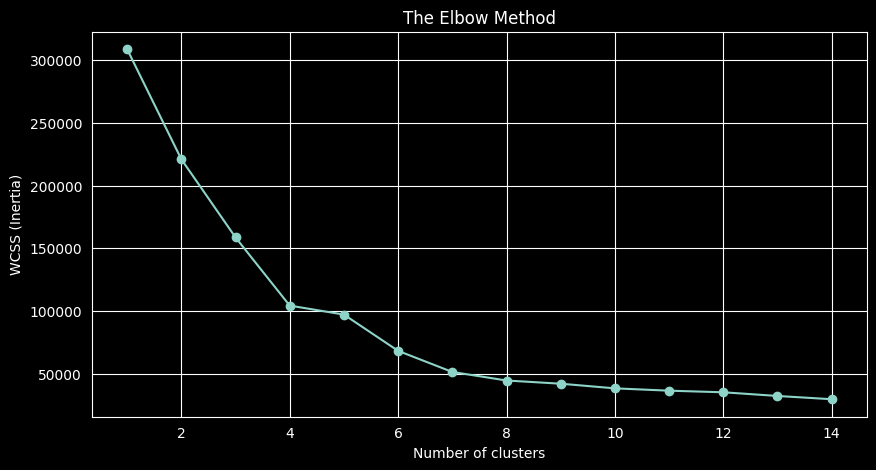

In [31]:
k = 15
wcss = []

for i in range(1, k):
    kmeans = KMeans(n_clusters=i, random_state=42, init='k-means++')
    kmeans.fit(data[['Age', 'Income', 'Score']])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph (to visually find K)
plt.figure(figsize=(10, 5))
plt.plot(range(1, k), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

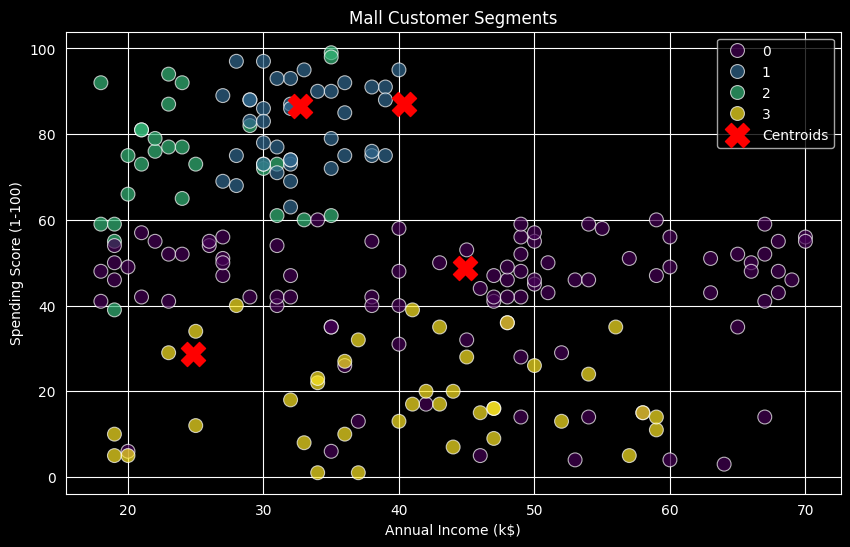

In [34]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data[['Age', 'Income', 'Score']])

# Add the cluster result back to our dataframe
data['Cluster'] = y_kmeans

# ==========================================
# Step 4: Visualizing the Clusters
# ==========================================
plt.figure(figsize=(10, 6))

# Plot each cluster with a different color
sns.scatterplot(x='Age', y='Score', hue='Cluster', data=data, palette='viridis', s=100, alpha=0.7)

# Plot the Centroids (The "center" of each cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', label='Centroids', marker='X')

plt.title('Mall Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()